<h1> Plants-Seedlings-Classification-using-CNN </h1>

<h2>• DOMAIN:</h2>
Botanical research
<h2>• CONTEXT:</h2> University X is currently undergoing some research involving understanding the characteristics of 
plant and plant seedlings at various stages of growth. They already have have invested on curating sample 
images. They require an automation which can create a classifier capable of determining a plant's species from a 
photo
<h2>• DATA DESCRIPTION:</h2> The dataset comprises of images from 12 plant species. Source: (https://www.kaggle.com/c/plant-seedlings-classification/data)

### 1. Import Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,BatchNormalization,Dropout,AvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### 2. Extract the dataSet

In [2]:
# generate train data from google drive using ImageDatagenerator
im_generator = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2,
                                  horizontal_flip=True
                                  )

# import the data
plant_train_data = im_generator.flow_from_directory('C:/Users/KISHORE/Downloads/train/',
                                                   class_mode='categorical',
                                                   target_size=(224,224), 
                                                   shuffle=True,
                                                   batch_size=32,
                                                   subset='training')
plant_val_data = im_generator.flow_from_directory('C:/Users/KISHORE/Downloads/train/',
                                                   class_mode='categorical',
                                                   target_size=(224,224),  
                                                   shuffle=True,
                                                   batch_size=32,
                                                   subset='validation')

Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.


 Observation : We can see in Tarin data we have 3816 images belongs to 12 classes and Validation data we have 951 images belongs to the 12 classes. lets See the Size of images and Names of the diffetrent classes

In [3]:
# lets check for shape of the data

plant_train_data[0][0].shape

# Observation : In our data, there are 50 images in 1 batch and Every image as of size 224X224 with 3 channes (RGB).

(32, 224, 224, 3)

In [4]:
# lets Check for the different classes
category = list(plant_train_data.class_indices.keys())
plant_train_data.class_indices

# observation : We can see the different plant names (Black-grass,maize,etc,.) 
# Lets check for nof of images in each type of plants in both train and validation data.

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [5]:
# lets see the no of images in Every Class in train data
for i in range(12):
    print(category[i],'has',len(plant_train_data.classes[plant_train_data.classes==i]),'images!')

Black-grass has 211 images!
Charlock has 312 images!
Cleavers has 230 images!
Common Chickweed has 489 images!
Common wheat has 177 images!
Fat Hen has 380 images!
Loose Silky-bent has 537 images!
Maize has 177 images!
Scentless Mayweed has 413 images!
Shepherds Purse has 185 images!
Small-flowered Cranesbill has 397 images!
Sugar beet has 308 images!


In [6]:
# lets see the no of images in Every Class in validation data
for i in range(12):
    print(category[i],'has',len(plant_val_data.classes[plant_val_data.classes==i]),'images!')

Black-grass has 52 images!
Charlock has 78 images!
Cleavers has 57 images!
Common Chickweed has 122 images!
Common wheat has 44 images!
Fat Hen has 95 images!
Loose Silky-bent has 134 images!
Maize has 44 images!
Scentless Mayweed has 103 images!
Shepherds Purse has 46 images!
Small-flowered Cranesbill has 99 images!
Sugar beet has 77 images!


### 3. Visualize the images

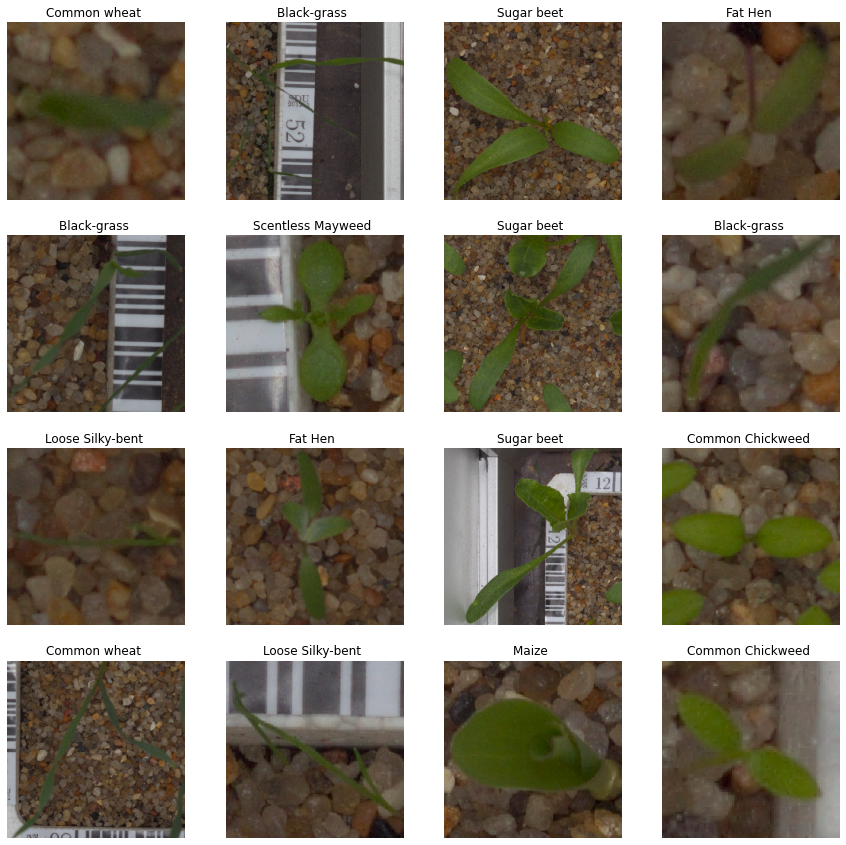

In [7]:
# lets see first image in Evary batch upto 16 batches.
plt.figure(figsize = (15,15))
for i in range(0,16) : 
    ax = plt.subplot(4,4,i+1) 
    plt.imshow(plant_train_data[i][0][0])
    plt.title(f"{category[np.argmax(plant_train_data[i][1][0])]} ")
    ax.axis("off")

Observation : We can see the different types of plants where Fat Hen and Common chickweed are looking similar.so, lets train with different Supervised Algorithms on the data.

### 4. Design, Train and Hypertuning the model

#### Decision tree Classifier

In [8]:
# before train Decision Tree classier we should convert image data into data set so that We can train with decion tree Algorithm
flat_data_arr=[] #input array
target_arr=[] #output array
img_array=[]

# make th path of data
datadir='C:/Users/KISHORE/Downloads/train'
for i in category:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_array=resize(img_array,(150,150,3))
        flat_data_arr.append(img_array.flatten())
        target_arr.append(category.index(i))
    print(f'loaded category:{i} successfully')
flat_data_arr=np.array(flat_data_arr)
target_arr=np.array(target_arr)


loading... category : Black-grass
loaded category:Black-grass successfully
loading... category : Charlock
loaded category:Charlock successfully
loading... category : Cleavers
loaded category:Cleavers successfully
loading... category : Common Chickweed
loaded category:Common Chickweed successfully
loading... category : Common wheat
loaded category:Common wheat successfully
loading... category : Fat Hen
loaded category:Fat Hen successfully
loading... category : Loose Silky-bent
loaded category:Loose Silky-bent successfully
loading... category : Maize
loaded category:Maize successfully
loading... category : Scentless Mayweed
loaded category:Scentless Mayweed successfully
loading... category : Shepherds Purse
loaded category:Shepherds Purse successfully
loading... category : Small-flowered Cranesbill
loaded category:Small-flowered Cranesbill successfully
loading... category : Sugar beet
loaded category:Sugar beet successfully


In [9]:
# covert array to data frame
data=pd.DataFrame(flat_data_arr)
data['Target']=target_arr

In [10]:
# Separate the predictors and independent variables
X=data.iloc[:,:-1] #input data 
y=data.iloc[:,-1] #output data

# scale the data
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [11]:
# split the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [12]:
# Initialize the algorithm
dt=DecisionTreeClassifier(random_state=1)

# fit the data
dt.fit(X_train,y_train)

# predict the data
y_pred=dt.predict(X_test)
print("Accuracy Score for train data : ",dt.score(X_train,y_train))
print("Model Accuracy : ",accuracy_score(y_pred,y_test))

Accuracy Score for train data :  1.0
Model Accuracy :  0.2882599580712788


Observation : We can see that the model is Overfitting. Model is good in training but in Testing it performed very badly.So, we cannot use Supervised learning Algorithms for image data.So, let try the ANN and CNN models for image classification.

#### ANN - Model

In [13]:
# Lets design Ann model to train the data
# Lets initialoze the neural network model
ann_model = Sequential()
ann_model.add(Flatten())
ann_model.add(Dense(256,activation ='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.4))
ann_model.add(Dense(128,activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.4))
ann_model.add(Dense(12,activation='softmax'))
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
History=ann_model.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 58s 463ms/step - loss: 2.9820 - accuracy: 0.1386 - val_loss: 3.9098 - val_accuracy: 0.0873
Epoch 2/20
120/120 [==============================] - 55s 460ms/step - loss: 2.3674 - accuracy: 0.2550 - val_loss: 2.5255 - val_accuracy: 0.2156
Epoch 3/20
120/120 [==============================] - 55s 460ms/step - loss: 2.0413 - accuracy: 0.3187 - val_loss: 3.1714 - val_accuracy: 0.1483
Epoch 4/20
120/120 [==============================] - 55s 459ms/step - loss: 1.8288 - accuracy: 0.3847 - val_loss: 2.6587 - val_accuracy: 0.2376
Epoch 5/20
120/120 [==============================] - 55s 458ms/step - loss: 1.7065 - accuracy: 0.4209 - val_loss: 1.9774 - val_accuracy: 0.3039
Epoch 6/20
120/120 [==============================] - 55s 462ms/step - loss: 1.6891 - accuracy: 0.4172 - val_loss: 2.7170 - val_accuracy: 0.2156
Epoch 7/20
120/120 [==============================] - 55s 460ms/step - loss: 1.6694 - accuracy: 0.4261 - val_loss: 3.8131 - val_ac

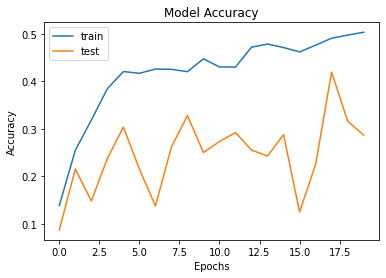

In [14]:
# lets plot the Accuracy of the model for train vs test
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation :  We can see that Model in getting overfitted and not performed well in both train and test data. the model is able to get 50% accuracy on the image data. So, Lets try CNN model and analyse the results.

#### CNN - Model

In [15]:
# Lets design CNN model without padding of filter size 32 and kernel size 3.
# with 2 dense layers.
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model1.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model1.add(Flatten())
cnn_model1.add(Dense(128,activation='relu'))
cnn_model1.add(Dense(12,activation='softmax'))
cnn_model1.compile(loss='categorical_crossentropy',metrics=['Accuracy'],optimizer='adam')
History=cnn_model1.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 69s 561ms/step - loss: 3.4260 - Accuracy: 0.3968 - val_loss: 1.5018 - val_Accuracy: 0.4763
Epoch 2/20
120/120 [==============================] - 66s 552ms/step - loss: 1.0678 - Accuracy: 0.6509 - val_loss: 1.0897 - val_Accuracy: 0.6372
Epoch 3/20
120/120 [==============================] - 66s 548ms/step - loss: 0.8323 - Accuracy: 0.7345 - val_loss: 1.0699 - val_Accuracy: 0.6488
Epoch 4/20
120/120 [==============================] - 66s 550ms/step - loss: 0.6526 - Accuracy: 0.7911 - val_loss: 0.9431 - val_Accuracy: 0.7161
Epoch 5/20
120/120 [==============================] - 66s 550ms/step - loss: 0.4763 - Accuracy: 0.8522 - val_loss: 1.0052 - val_Accuracy: 0.6930
Epoch 6/20
120/120 [==============================] - 66s 547ms/step - loss: 0.4233 - Accuracy: 0.8629 - val_loss: 1.1139 - val_Accuracy: 0.6866
Epoch 7/20
120/120 [==============================] - 67s 555ms/step - loss: 0.2802 - Accuracy: 0.9135 - val_loss: 1.1645 - val_Ac

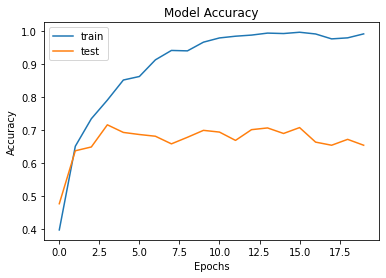

In [16]:
# lets plot accuracy of the model for train vs test
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : We can see that out model is getting overfitted again but test accuracy is good when compare to previous models.on train data the model gets good accuracy but in testing it is only performed 60% Correctly. So, lets add droput layer Batch normalization in Fully connected layers and Maxpolling technique in covolutional layers to avoid overfitting.

In [17]:
# Lets design CNN model without padding of filter size 32 and kernel size 3.
# with 2 dense layers, with batch normalization, dropout layers and Maxpooling
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model2.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(128,activation='relu'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.4))
cnn_model2.add(Dense(12,activation='softmax'))
cnn_model2.compile(loss='categorical_crossentropy',metrics=['Accuracy'],optimizer='adam')
History = cnn_model2.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 65s 534ms/step - loss: 1.9994 - Accuracy: 0.3339 - val_loss: 8.1271 - val_Accuracy: 0.1651
Epoch 2/20
120/120 [==============================] - 58s 485ms/step - loss: 1.4059 - Accuracy: 0.5364 - val_loss: 3.4172 - val_Accuracy: 0.2702
Epoch 3/20
120/120 [==============================] - 58s 481ms/step - loss: 1.1733 - Accuracy: 0.6242 - val_loss: 2.4698 - val_Accuracy: 0.2829
Epoch 4/20
120/120 [==============================] - 58s 479ms/step - loss: 1.0017 - Accuracy: 0.6840 - val_loss: 1.7969 - val_Accuracy: 0.4795
Epoch 5/20
120/120 [==============================] - 58s 483ms/step - loss: 0.8504 - Accuracy: 0.7442 - val_loss: 1.8775 - val_Accuracy: 0.3838
Epoch 6/20
120/120 [==============================] - 58s 484ms/step - loss: 0.7330 - Accuracy: 0.7759 - val_loss: 1.7796 - val_Accuracy: 0.4616
Epoch 7/20
120/120 [==============================] - 58s 484ms/step - loss: 0.6285 - Accuracy: 0.8126 - val_loss: 2.1632 - val_Ac

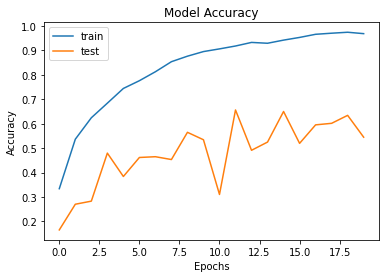

In [18]:
# lets plot the accuracy of the model for train vs test
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : We can see that again we are facing overfitting issue model is performing good in training but not much as good in testing. so, lets add a stride to the convolutional layers and lets analyse the results.

In [19]:
# Lets design CNN model without padding of filter size 32, kernel size 3, stride size 2.
# with 2 dense layers.
cnn_model4 = Sequential()
cnn_model4.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model4.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model4.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model4.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model4.add(Flatten())
cnn_model4.add(Dense(128,activation='relu'))
cnn_model4.add(BatchNormalization())
cnn_model4.add(Dropout(0.4))
cnn_model4.add(Dense(12,activation='softmax'))
cnn_model4.compile(loss='categorical_crossentropy',metrics=['Accuracy'],optimizer='adam')
History = cnn_model4.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 56s 461ms/step - loss: 1.8037 - Accuracy: 0.4091 - val_loss: 2.1601 - val_Accuracy: 0.2482
Epoch 2/20
120/120 [==============================] - 54s 456ms/step - loss: 1.2774 - Accuracy: 0.5818 - val_loss: 1.8463 - val_Accuracy: 0.2650
Epoch 3/20
120/120 [==============================] - 54s 454ms/step - loss: 1.0791 - Accuracy: 0.6557 - val_loss: 1.2921 - val_Accuracy: 0.6519
Epoch 4/20
120/120 [==============================] - 54s 455ms/step - loss: 0.9094 - Accuracy: 0.7070 - val_loss: 1.2842 - val_Accuracy: 0.5836
Epoch 5/20
120/120 [==============================] - 55s 458ms/step - loss: 0.8130 - Accuracy: 0.7332 - val_loss: 0.8902 - val_Accuracy: 0.6961
Epoch 6/20
120/120 [==============================] - 54s 450ms/step - loss: 0.7083 - Accuracy: 0.7736 - val_loss: 0.7319 - val_Accuracy: 0.7687
Epoch 7/20
120/120 [==============================] - 54s 454ms/step - loss: 0.6481 - Accuracy: 0.7961 - val_loss: 1.3210 - val_Ac

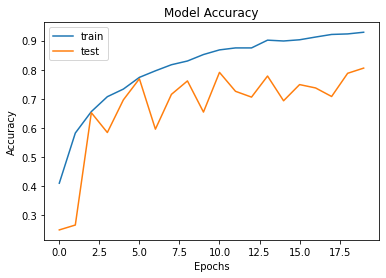

In [20]:
# lets plot accuracy of the model for train vs test
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : We can see that we are getting good results when we add stride to the convolutional layers. but we are in Overfitting condition some times model is not efficiently good in predicting the images. so, lets perform another model with 4 convolutional layers with stride and maxpooling.

In [21]:
# Lets design CNN model without padding of filter size 32, kernel size 3, stride size 2.
# with 2 dense layers.
History=None
cnn_model5 = Sequential()
cnn_model5.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model5.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model5.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model5.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model5.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model5.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model5.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model5.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model5.add(Flatten())
cnn_model5.add(Dense(12,activation='softmax'))
cnn_model5.compile(loss='categorical_crossentropy',metrics=['Accuracy'],optimizer='adam')
History = cnn_model5.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 56s 460ms/step - loss: 2.4356 - Accuracy: 0.1397 - val_loss: 2.3716 - val_Accuracy: 0.2576
Epoch 2/20
120/120 [==============================] - 55s 454ms/step - loss: 2.0279 - Accuracy: 0.3011 - val_loss: 1.7588 - val_Accuracy: 0.4164
Epoch 3/20
120/120 [==============================] - 55s 456ms/step - loss: 1.6587 - Accuracy: 0.4122 - val_loss: 1.5623 - val_Accuracy: 0.4385
Epoch 4/20
120/120 [==============================] - 54s 450ms/step - loss: 1.5320 - Accuracy: 0.4382 - val_loss: 1.4874 - val_Accuracy: 0.4543
Epoch 5/20
120/120 [==============================] - 54s 450ms/step - loss: 1.4558 - Accuracy: 0.4730 - val_loss: 1.5327 - val_Accuracy: 0.4679
Epoch 6/20
120/120 [==============================] - 54s 452ms/step - loss: 1.3768 - Accuracy: 0.5152 - val_loss: 1.4364 - val_Accuracy: 0.4816
Epoch 7/20
120/120 [==============================] - 54s 453ms/step - loss: 1.2796 - Accuracy: 0.5519 - val_loss: 1.3377 - val_Ac

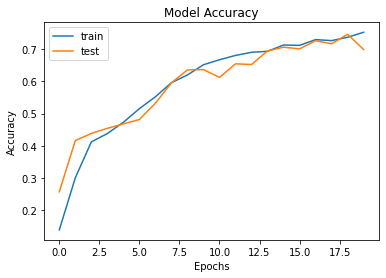

In [22]:
# lets plot accuracy of the model for train vs test
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : we can see that model is performing very well that we are getting slight overfitting but it is efficiently predicting the images. so lets add Fully connected layer to the end of convolutional layers and check for the results.

In [23]:
# make History to None to Avoid Memory Error.
History=None

In [24]:
# Lets design CNN model without padding of filter size 32, kernel size 3, stride size 2.
# with 2 dense layers.
cnn_model6 = Sequential()
cnn_model6.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model6.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model6.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model6.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model6.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model6.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model6.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'))
cnn_model6.add(MaxPool2D(pool_size=(2, 2) ,padding = 'same'))
cnn_model6.add(Flatten())
cnn_model6.add(Dense(128,activation='relu'))
cnn_model6.add(BatchNormalization())
cnn_model6.add(Dropout(0.4))
cnn_model6.add(Dense(12,activation='softmax'))
cnn_model6.compile(loss='categorical_crossentropy',metrics=['Accuracy'],optimizer='adam')
History = cnn_model6.fit(plant_train_data,epochs=20,validation_data=(plant_val_data))

Epoch 1/20
120/120 [==============================] - 55s 451ms/step - loss: 2.2265 - Accuracy: 0.2220 - val_loss: 2.3636 - val_Accuracy: 0.2177
Epoch 2/20
120/120 [==============================] - 55s 458ms/step - loss: 1.6328 - Accuracy: 0.4479 - val_loss: 2.1433 - val_Accuracy: 0.2944
Epoch 3/20
120/120 [==============================] - 53s 441ms/step - loss: 1.3030 - Accuracy: 0.5537 - val_loss: 1.7383 - val_Accuracy: 0.3281
Epoch 4/20
120/120 [==============================] - 53s 443ms/step - loss: 1.1992 - Accuracy: 0.5998 - val_loss: 1.4543 - val_Accuracy: 0.5121
Epoch 5/20
120/120 [==============================] - 54s 447ms/step - loss: 1.0755 - Accuracy: 0.6386 - val_loss: 1.0799 - val_Accuracy: 0.6372
Epoch 6/20
120/120 [==============================] - 53s 447ms/step - loss: 1.0278 - Accuracy: 0.6549 - val_loss: 1.1325 - val_Accuracy: 0.6583
Epoch 7/20
120/120 [==============================] - 53s 445ms/step - loss: 0.9662 - Accuracy: 0.6719 - val_loss: 0.9413 - val_Ac

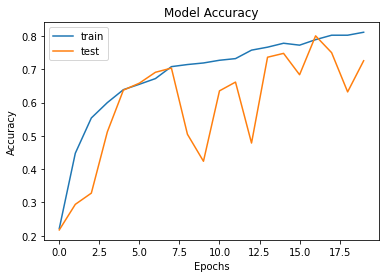

In [25]:
# lets plot the accuracy of the model for train vs test
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : we can see after adding fully connected layer again we are getting overfitting the data. so, we can use model with 4 convolutional layers to predict the images of plants. lets check for pre used models of convolutional Network which are used for most of the CNN Problems. We have files containg the weights of the used Convolutional models. Available Models are Resnet, VggNet, AlexNet,etc., Lets use the resnet model which is giving the low Error rate among the all cnn models. lets imoport the resnet model using Transfer learning technique.

In [26]:
# transfer learning 
import tensorflow_hub as hub

# save the url of the model
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

# create a function to get resnet model
def create_model(model_url,num_classes):
    # import the resnet model make trainable = false for Speed processing
    feature_extractor_layer = hub.KerasLayer(model_url, trainable = False,name = 'feature_ext_layer',input_shape = (224,224,3))
    # make the model using resnet
    model = Sequential([feature_extractor_layer,Dense(num_classes,activation = 'softmax',name = 'output_layer')])
    # return the resnet model
    return model

# call the function to get resnet model
resnet_model = create_model(resnet_url,12)

In [27]:
# lets see the summary of resnet model
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_ext_layer (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 12)                24588     
                                                                 
Total params: 23,589,388
Trainable params: 24,588
Non-trainable params: 23,564,800
_________________________________________________________________


Observation : We can see that resnet model have more than 23M Trainable parameters. But in our notebook we are only train the model using trainable prameters with own fully connected layer. In model we are getting trained by on 24K parameters.

In [28]:
# Lets compile the resnet model using adam optimizer
resnet_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])

In [29]:
#lets fit resnet model to our data
History = resnet_model.fit(plant_train_data,epochs = 20, validation_data = plant_val_data)

Epoch 1/20
120/120 [==============================] - 72s 547ms/step - loss: 1.3734 - Accuracy: 0.5650 - val_loss: 0.9343 - val_Accuracy: 0.7340
Epoch 2/20
120/120 [==============================] - 61s 503ms/step - loss: 0.6949 - Accuracy: 0.8011 - val_loss: 0.7099 - val_Accuracy: 0.7823
Epoch 3/20
120/120 [==============================] - 61s 511ms/step - loss: 0.5340 - Accuracy: 0.8475 - val_loss: 0.6171 - val_Accuracy: 0.8307
Epoch 4/20
120/120 [==============================] - 61s 509ms/step - loss: 0.4331 - Accuracy: 0.8821 - val_loss: 0.5582 - val_Accuracy: 0.8486
Epoch 5/20
120/120 [==============================] - 62s 519ms/step - loss: 0.3785 - Accuracy: 0.8965 - val_loss: 0.5482 - val_Accuracy: 0.8370
Epoch 6/20
120/120 [==============================] - 62s 519ms/step - loss: 0.3376 - Accuracy: 0.9054 - val_loss: 0.5433 - val_Accuracy: 0.8360
Epoch 7/20
120/120 [==============================] - 62s 516ms/step - loss: 0.2893 - Accuracy: 0.9240 - val_loss: 0.5122 - val_Ac

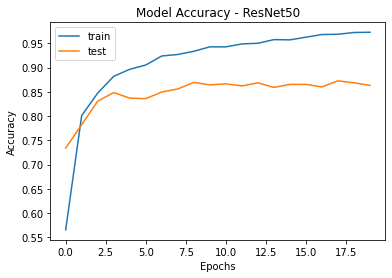

In [30]:
# lets plot accuracy of the Resnet model for train vs test.
plt.plot(History.history['Accuracy'])
plt.plot(History.history['val_Accuracy'])
plt.title('Model Accuracy - ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Observation : We can see that Resnet model is performing very well. so, we are getting good results when we use transfer learnign to predict the images data. But the resnet is getting overfitted but it is getting good results in both training and testing.Lets make it pickle to save the model for future use.

### 5. Observations

* From the above all models we are getting good results from only 2 models.those are ResNet and cnn_model_5 consists of 4 convolutional layers.
* most of the models getting overfitted and not able to getting good results in the prediction.
* Only CNN models are performed well where Supervised and ANN models are poorly performed so for that we cannot use those models for image classification.
* When we use More Convolutional layers in the model then it giving good results but it getting overfitted.
* Only Resnet will giving best results among the Models. because, resnet is already trained on the on image datan over 1K Classes. but in our case we are using resnet only for 12 classes for that we are getting overfitiing.
* Lets Predict the image using Renset model.

In [31]:
# Lets Save the model for Future use
import pickle
pickle.dump(resnet_model,open('resnet50_model_file','wb'))

In [32]:
# import cv2 module to import the image
import cv2

In [33]:
# read the Predicted image
pred_img = cv2.imread('Predict.png')

In [34]:
# lets see the values in the image
pred_img

array([[[ 54,  72,  89],
        [ 57,  76,  91],
        [ 64,  82,  96],
        ...,
        [ 53,  75, 101],
        [ 46,  64,  93],
        [ 43,  60,  87]],

       [[ 58,  76,  92],
        [ 58,  76,  92],
        [ 59,  78,  92],
        ...,
        [ 57,  79, 105],
        [ 48,  67,  95],
        [ 46,  63,  89]],

       [[ 60,  78,  95],
        [ 56,  75,  91],
        [ 58,  77,  92],
        ...,
        [ 59,  82, 107],
        [ 47,  68,  95],
        [ 53,  71,  96]],

       ...,

       [[ 58,  77,  93],
        [ 63,  80,  94],
        [ 66,  82,  95],
        ...,
        [ 66,  91,  93],
        [ 79, 101, 103],
        [ 72,  93,  97]],

       [[ 55,  74,  90],
        [ 63,  80,  94],
        [ 69,  84,  97],
        ...,
        [ 69,  97,  97],
        [ 74, 100, 101],
        [ 71,  96,  99]],

       [[ 58,  76,  91],
        [ 61,  78,  92],
        [ 63,  79,  92],
        ...,
        [ 67, 100,  99],
        [ 67,  98,  99],
        [ 68,  97, 100]]

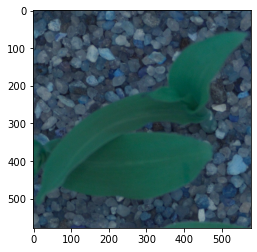

In [35]:
# lets see the image
plt.imshow(pred_img)

# observation : We can see tha image to be predict it is look like maize.
# lets see what is the Result that we get after performed with model.

In [36]:
# check for shape of the image
pred_img.shape

# observation : shape of the image i 578X578 so lets resize the image to 224X224 to run the model.

(578, 578, 3)

In [37]:
# resize the image
pred_img = cv2.resize(pred_img,(224,224))

In [38]:
# check for the shape
pred_img.shape

(224, 224, 3)

In [39]:
# Expand the dimensions so that model get as a data.
pred_img = np.expand_dims(pred_img, axis=0)

In [40]:
# predict the model
prediction = resnet_model_1.predict(pred_img)
category[np.where(np.array(prediction>0.8).flatten() == True)[0][0]]

'Maize'

#### Observation : We can see that resnet50 model is Predict its as maiz crop.

### Conclusion:
    

* Best model is ResNet50 and it is predicted correctly when we give the External image.
* We performed Supervised, ANN and CNN models. But only CNN is Effective.
* We performed CNN with Padding and Without padding, with stride and Whithout Stride.
* CNN model with Stride performed well but It is slow.
* We also performed Transfer Learning to get the trainable Weights to perform the model.
* Also We can see Different Models Accuracies on Plots.